# Tutorial on how to run balfinder on DESI mocks and DESI SV data

Check that this notebook is using the DESI master or some other recent DESI kernel.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
from astropy.io import fits
from glob import glob

import fitsio
from collections import defaultdict
import desispec.io
from desispec.coaddition import coadd_cameras

Populating the interactive namespace from numpy and matplotlib


### Add the baltools package to your path

Change this to your location

In [18]:
sys.path.append("/global/homes/m/martini/Repos/baltools/py")

Now import the baltools

In [21]:
import baltools
from baltools import balconfig as bc
from baltools import plotter, fitbal, baltable
from baltools import desibal as db

### DESI SV Example

Find BALs in the same data as used in the "Intro to SV" tutorial. This BAL finding tutorial will be easier to follow if you are already familiar with that one. 

First set the path to the data and the filename

In [23]:
%set_env DESI_SPECTRO_REDUX=/global/cfs/cdirs/desi/spectro/redux
%set_env SPECPROD=daily

env: DESI_SPECTRO_REDUX=/global/cfs/cdirs/desi/spectro/redux
env: SPECPROD=daily


In [24]:
tile, date, spectrograph = "70003", "20200226", "0"
dirname = os.path.join(os.getenv("DESI_SPECTRO_REDUX"), os.getenv("SPECPROD"), "tiles", tile, date)
filename = "coadd-{}-{}-{}.fits".format(spectrograph, tile, date)
specfilename = os.path.join(dirname, filename)
print(specfilename)

/global/cfs/cdirs/desi/spectro/redux/daily/tiles/70003/20200226/coadd-0-70003-20200226.fits


For the SV analysis, the BAL catalog will go into an alternate directory from the one with the spectra and redshifts. Here is one option for the baldata, and the corresponding filename for the BAL catalog:

In [25]:
# Directory to put BAL catalog: 
altbaldir = os.path.join('/global/cfs/cdirs/desi/users/', os.getlogin())

# Filename for BAL catalog
baltmp = specfilename.replace('coadd-', 'baltable-')
balfilename = os.path.join(altbaldir + "/", baltmp[baltmp.rfind("baltable-")::])
print(balfilename)

/global/cfs/cdirs/desi/users/martini/baltable-0-70003-20200226.fits


Run the BAL finder

In [26]:
db.desibalfinder(specfilename, altbaldir=altbaldir, overwrite=True, verbose=True)

Output BAL catalog: /global/cfs/cdirs/desi/users/martini/baltable-0-70003-20200226.fits
0 Processed 35191248226618415 at z = 4.46: AI_CIV = 0, BI_CIV = 0
1 Processed 35191248230812543 at z = 1.88: AI_CIV = 0, BI_CIV = 0
2 Processed 35191251963742305 at z = 1.87: AI_CIV = 0, BI_CIV = 0
3 Processed 35191251963742743 at z = 1.73: AI_CIV = 0, BI_CIV = 0
4 Processed 35191251967935906 at z = 1.78: AI_CIV = 0, BI_CIV = 0
5 Processed 35191251967936463 at z = 2.22: AI_CIV = 0, BI_CIV = 0
6 Processed 35191251967937073 at z = 2.47: AI_CIV = 0, BI_CIV = 0
7 Processed 35191255684088899 at z = 1.74: AI_CIV = 0, BI_CIV = 0
8 Processed 35191255684090482 at z = 2.07: AI_CIV = 0, BI_CIV = 0
9 Processed 35191255684090844 at z = 1.60: AI_CIV = 334, BI_CIV = 0
10 Processed 35191255688283243 at z = 2.25: AI_CIV = 0, BI_CIV = 0
11 Processed 35191255688283356 at z = 2.22: AI_CIV = 0, BI_CIV = 0
12 Processed 35191255688283639 at z = 1.85: AI_CIV = 397, BI_CIV = 0
13 Processed 35191255688284750 at z = 3.34: AI_

#### Inspect the output:

Read in the catalog and the spectra: 

In [27]:
balcat = fitsio.read(balfilename)
specobj = desispec.io.read_spectra(specfilename)

Put the indicies of those with AI_CIV > 0 into 'bals'

In [29]:
bmask = balcat['AI_CIV'] > 0.
bals = []
dd = defaultdict(list)
for index, item in enumerate(balcat['TARGETID']):
    if bmask[index]:
        dd[item].append(index)
        bals.append(index)

Plot the BALs 

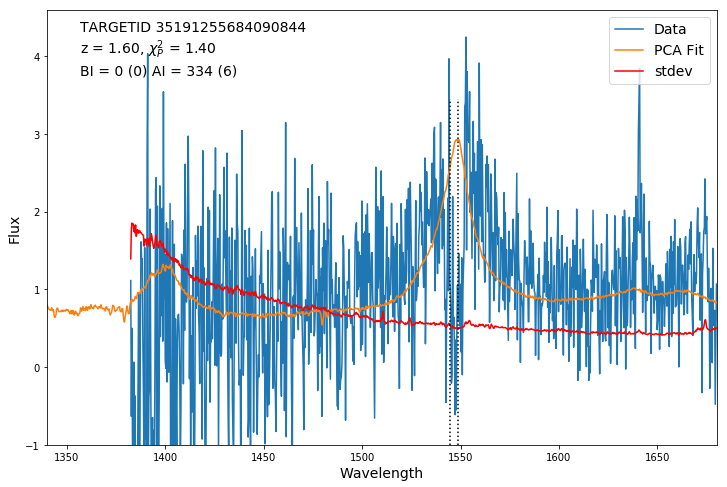

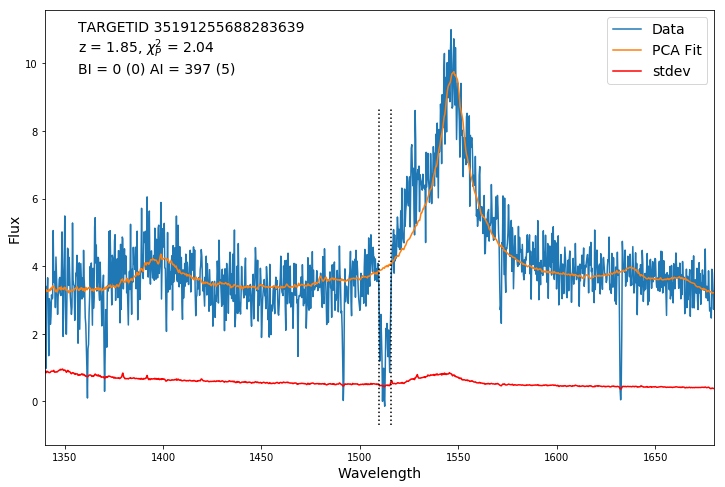

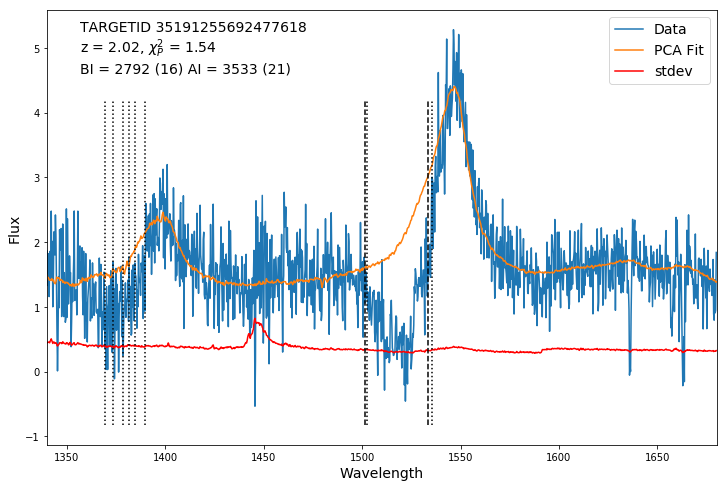

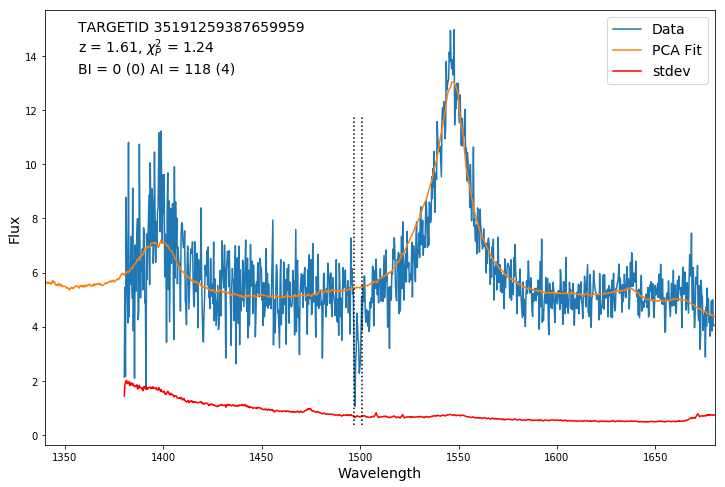

In [30]:
for bal in bals: 
    targetid = balcat['TARGETID'][bal]
    plotter.plotdesibal(specobj, balcat, targetid) 

## DESI Mock Example

This example finds BALs that were created for the 2020 Tucson meeting by the LyA WG

Start by setting the directory and filename

In [31]:
# Mock data with BALs 
basedir = '/global/cfs/cdirs/desi/science/lya/arizona_hack_bal/'
specdir = '10/1052/'
baldir = basedir + 'arizona-0.4/spectra-16/' + specdir
specfilename = glob(baldir+'spectra*')[0]
print(specfilename)

/global/cfs/cdirs/desi/science/lya/arizona_hack_bal/arizona-0.4/spectra-16/10/1052/spectra-16-1052.fits


Run the BAL finder

In [33]:
db.desibalfinder(specfilename, overwrite=True, verbose=True)

Output BAL catalog: /global/cfs/cdirs/desi/science/lya/arizona_hack_bal/arizona-0.4/spectra-16/10/1052/baltable-16-1052.fits
0 Processed 10130863 at z = 1.84: AI_CIV = 0, BI_CIV = 0
1 Processed 10131179 at z = 1.94: AI_CIV = 0, BI_CIV = 0
2 Processed 10131448 at z = 1.81: AI_CIV = 4058, BI_CIV = 2692
3 Processed 10131735 at z = 1.91: AI_CIV = 0, BI_CIV = 0
4 Processed 10132031 at z = 1.86: AI_CIV = 0, BI_CIV = 0
5 Processed 10132039 at z = 1.91: AI_CIV = 0, BI_CIV = 0
6 Processed 10132333 at z = 1.93: AI_CIV = 0, BI_CIV = 0
7 Processed 10153262 at z = 2.57: AI_CIV = 0, BI_CIV = 0
8 Processed 10153289 at z = 2.76: AI_CIV = 0, BI_CIV = 0
9 Processed 10153659 at z = 2.32: AI_CIV = 0, BI_CIV = 0
10 Processed 10153664 at z = 3.17: AI_CIV = 0, BI_CIV = 0
11 Processed 10153668 at z = 2.76: AI_CIV = 0, BI_CIV = 0
12 Processed 10154015 at z = 2.50: AI_CIV = 0, BI_CIV = 0
13 Processed 10154016 at z = 2.43: AI_CIV = 0, BI_CIV = 0
14 Processed 10154019 at z = 2.56: AI_CIV = 0, BI_CIV = 0
15 Proces

#### Inspect the output:

Read in the catalog and the spectra: 

In [34]:
balfilename = '/global/cfs/cdirs/desi/science/lya/arizona_hack_bal/arizona-0.4/spectra-16/10/1052/baltable-16-1052.fits'
balcat = fitsio.read(balfilename)

# Read in the spectra, coadd them if necessary (necessary for Tucson mocks)
specobj = desispec.io.read_spectra(specfilename)
if 'brz' not in specobj.wave.keys():
    specobj = coadd_cameras(specobj, cosmics_nsig=None)

Put the indicies of those with AI_CIV > 0 into 'bals'

In [17]:
bmask = balcat['AI_CIV'] > 0.
bals = []
dd = defaultdict(list)
for index, item in enumerate(balcat['TARGETID']):
    if bmask[index]:
        dd[item].append(index)
        bals.append(index)

Plot a subset of the BALs 

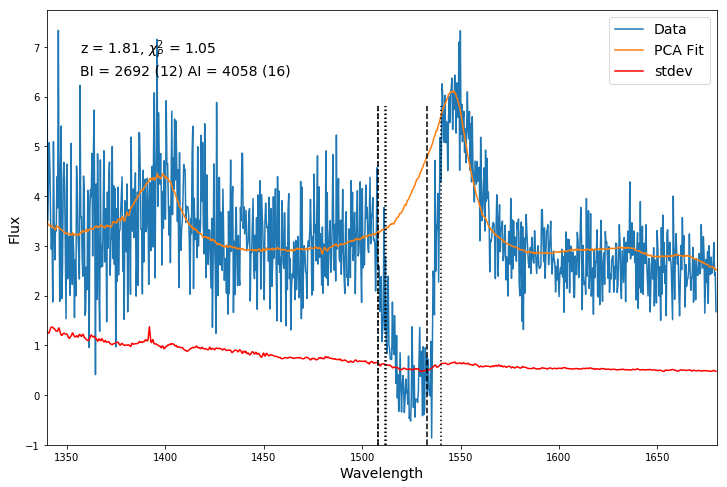

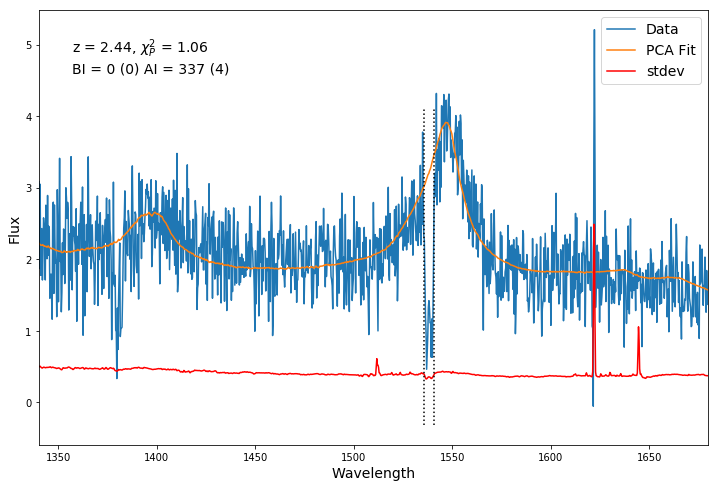

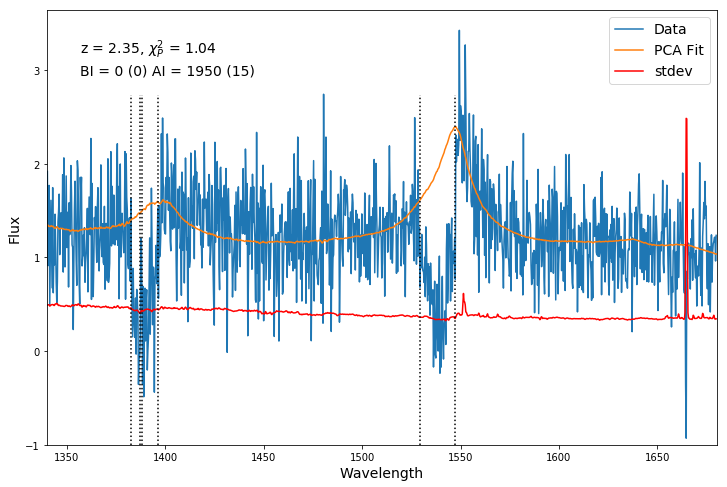

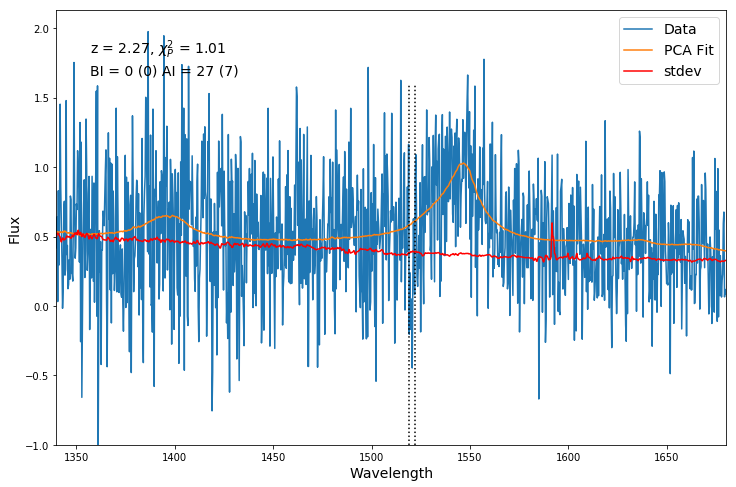

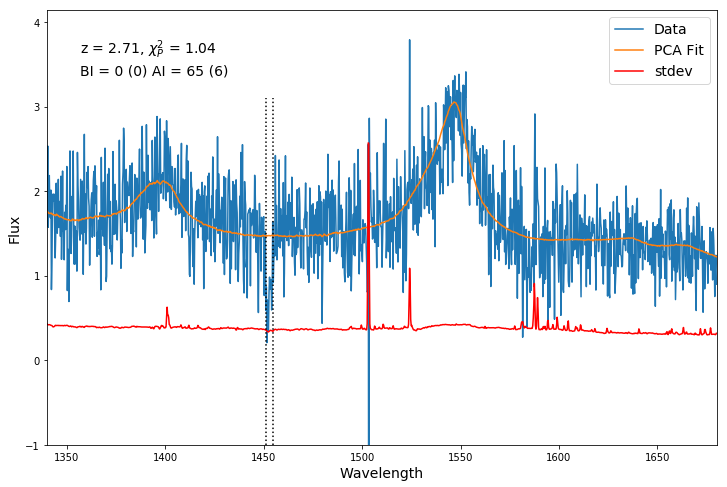

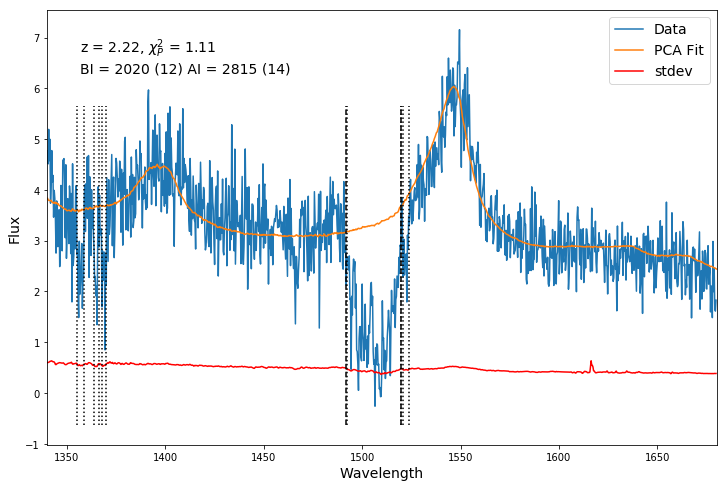

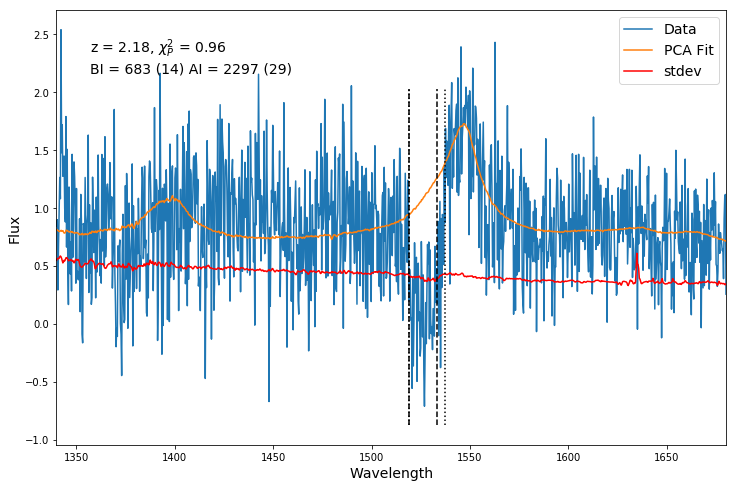

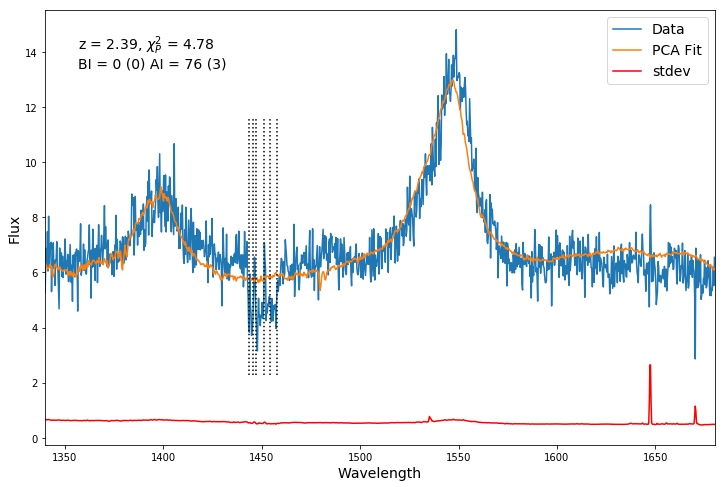

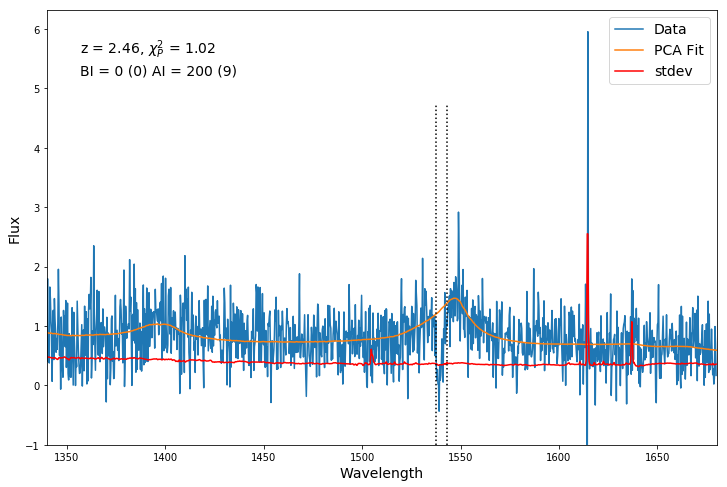

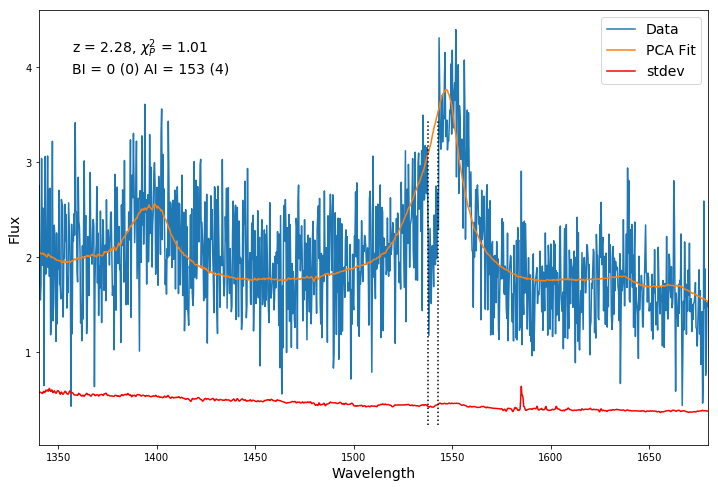

In [18]:
nshow = 10
for i in range(nshow):
    targetid = balcat['TARGETID'][bals[i]]
    plotter.plotdesibal(specobj, balcat, targetid) 